In [1]:
import os
import os.path as osp
import argparse
from datetime import date
import json
import random
import time
from pathlib import Path
import numpy as np
import numpy.linalg as LA
import torch.linalg
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import csv

import pandas as pd

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader


import pandas as pd
import glm

/home/kmuvcl/anaconda3/envs/cuti/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "/home/kmuvcl/source/oldCuTi/CuTi/matterport/mp3d_planercnn_json/cached_set_test.json"
root = "/home/kmuvcl/source/oldCuTi/CuTi/matterport/"

In [3]:
with open(path) as f:
        split = json.load(f)

dset = split

In [4]:
dset['data'][1]['rel_pose']

{'position': [-0.16339169781799, 0.5172137279301707, -2.5072380667515186],
 'rotation': [-0.22748901285929143,
  -6.938893903907228e-18,
  -0.9558895540909793,
  -0.18580610702572037]}

In [51]:
rotation = pd.read_csv("/home/kmuvcl/source/moonCuTi/CuTi/output/{one_hot}/matterport_test/gt_rotation_magnitude_vs_error.csv")

In [52]:
rotation['gt']

0        45.93768
1       153.70143
2        49.19945
3        55.30919
4        39.19428
          ...    
7991    119.15277
7992    127.06060
7993      4.72945
7994    134.30828
7995      9.46178
Name: gt, Length: 7996, dtype: float64

In [53]:
error_rot = []
for i in range(7996):
    error_rot.append(rotation['error'][i])

In [54]:
gt_rot = []
for i in range(len(rotation['gt'])):
    gt_rot.append(rotation['gt'][i])

In [55]:
len(rotation['gt'])

7996

In [56]:
sum(gt_rot)/len(gt_rot)

53.48076676088048

In [57]:
min(gt_rot)

0.00517

In [58]:
max(gt_rot)

179.89357

In [59]:
pred_rot = []
for i in range(7996):
    pred_rot.append(rotation['pred'][i])

In [87]:
x = ['0-20','20-40','40-60','60-80','80-100','100-120','else']
y = [0,0,0,0,0,0,0]

In [89]:
len(y)

7

In [91]:
for i in range(len(pred_rot)):
    if pred_rot[i]>=0 and pred_rot[i]<20:
        y[0] += 1
    elif pred_rot[i]>=20 and pred_rot[i]<40:
        y[1] += 1
    elif pred_rot[i]>=40 and pred_rot[i]<60:
        y[2] += 1
    elif pred_rot[i]>=60 and pred_rot[i]<80:
        y[3] += 1
    elif pred_rot[i]>=80 and pred_rot[i]<100:
        y[4] += 1
    elif pred_rot[i]>=100 and pred_rot[i]<120:
        y[5] += 1
    else:
        y[6] += 1

    

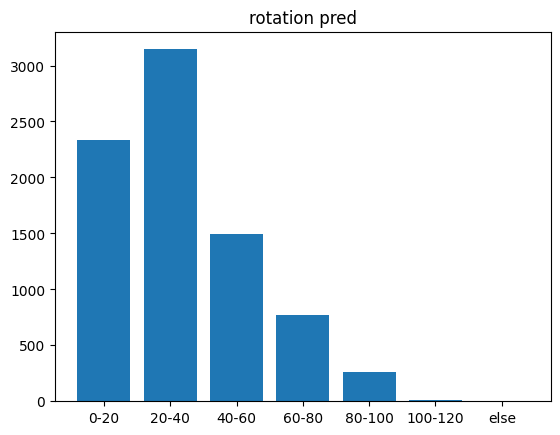

In [92]:
plt.title('rotation pred')
plt.bar(x, y)
plt.show()

In [93]:
translation = pd.read_csv("/home/kmuvcl/source/moonCuTi/CuTi/output/{one_hot}/matterport_test/gt_translation_magnitude_vs_error.csv")

In [94]:
pred_tra = []
for i in range(len(translation['pred'])):
    pred_tra.append(translation['pred'][i])

In [95]:
gt_tra = []
for i in range(len(translation['gt'])):
    gt_tra.append(translation['gt'][i])

In [96]:
len(gt_tra)

7996

In [97]:
sum(gt_tra)/len(gt_tra)

2.31284513506754

In [98]:
min(gt_tra)

0.01728

In [99]:
max(gt_tra)

16.71663

In [112]:
x = ['0.0-0.5','0.5-1.0','1.0-1.5','1.5-2.0','2.0-2.5','2.5-3.0','else']
y = [0,0,0,0,0,0,0]



In [113]:
for i in range(len(pred_tra)):
    if pred_tra[i]>=0 and pred_tra[i]<0.5:
        y[0] += 1
    elif pred_tra[i]>=0.5 and pred_tra[i]<1.0:
        y[1] += 1
    elif pred_tra[i]>=1.0 and pred_tra[i]<1.5:
        y[2] += 1
    elif pred_tra[i]>=1.5 and pred_tra[i]<2.0:
        y[3] += 1
    elif pred_tra[i]>=2.0 and pred_tra[i]<2.5:
        y[4] += 1
    elif pred_tra[i]>=2.5 and pred_tra[i]<3.0:
        y[5] += 1
    else:
        y[6] += 1

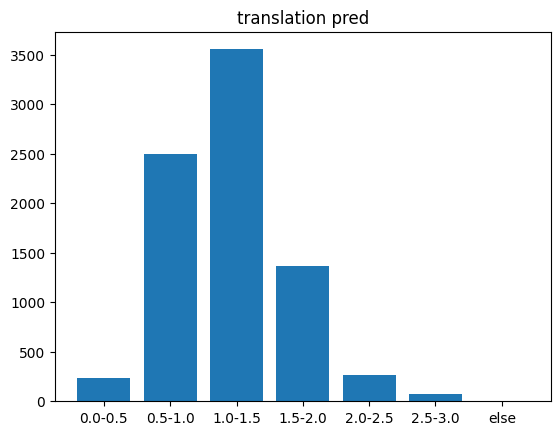

In [114]:
plt.title('translation pred')
plt.bar(x, y)
plt.show()

In [103]:
sum(pred_rot)/len(pred_rot)

34.06225150825413

In [ ]:
gt_rot[7740]

In [ ]:
gt_rot.index(max(gt_rot))

In [ ]:
max(error_rot)

In [ ]:
error_rot.index(max(error_rot))

In [ ]:
t = 7243

In [ ]:
dset['data'][t]['0']['file_name']

In [ ]:
dset['data'][t]['1']['file_name']

In [ ]:
print('gt_rot',rotation['gt'][t])
print('error_rot',rotation['error'][t])

In [ ]:
error_rot.sort()

In [ ]:
gt_rot.index(11.70125)

In [ ]:
error_rot[618]

In [ ]:
gt_rot.sort()

In [ ]:
gt_rot

In [ ]:
translation = pd.read_csv("/home/kmuvcl/source/oldCuTi/CuTi/logs/output/gt_translation_magnitude_vs_error.csv")

In [ ]:
error_tra = []
for i in range(7996):
    error_tra.append(translation['error'][i])

In [ ]:
gt_tra = []
for i in range(7996):
    gt_tra.append(translation['gt'][i])

In [ ]:
error_tra.index(0.2164)

In [ ]:
t = 6403
print(dset['data'][t]['0']['file_name'])
print(dset['data'][t]['1']['file_name'])

In [ ]:
print('gt_tra',translation['gt'][t])
print('error_tra',translation['error'][t])

In [ ]:
error_tra.sort()

In [ ]:
error_tra